Aula Preparação de dados e Avaliação de Modelos



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.DataFrame({"nome":['Peter','Bruce', "T'Challa"],
              "simbolo": ['aranha', 'morcego', 'pantera'],
              "idade": [22, pd.NaT, 25]})

In [ ]:
df

,nome,simbolo,idade
0,Peter,aranha,22
1,Bruce,morcego,NaT
2,T'Challa,pantera,25


In [ ]:
df.dropna()
# dropna remove as linhas com NAT (faltando alguma informação)

,nome,simbolo,idade
0,Peter,aranha,22
2,T'Challa,pantera,25


In [ ]:
df

,nome,simbolo,idade
0,Peter,aranha,22
1,Bruce,morcego,NaT
2,T'Challa,pantera,25


In [ ]:
df.dropna(inplace=True)
# vai alterar o df , alterar retirando a linha com valor vazio

In [ ]:
df

,nome,simbolo,idade
0,Peter,aranha,22
2,T'Challa,pantera,25


**RMSE**

In [ ]:
# Valores reais
reais = [100000, 150000, 200000, 250000, 300000]

# Valores previstos pelo modelo
prev = [95000, 142000, 210000, 245000, 315000]

In [ ]:
diferencas = []

for idx in range(len(reais)):
  diferencas.append(reais[idx] - prev[idx])

diferencas

[5000, 8000, -10000, 5000, -15000]

In [ ]:
diferencas = []

for r, p in zip(reais, prev):
  diferencas.append(r-p)

diferencas

[5000, 8000, -10000, 5000, -15000]

In [ ]:
diferencas = [r - p for r, p in zip (reais, prev)]

diferencas

[5000, 8000, -10000, 5000, -15000]

In [ ]:
quadrados_das_diferencas = [d ** 2 for d in diferencas]
quadrados_das_diferencas

[25000000, 64000000, 100000000, 25000000, 225000000]

In [ ]:
mse = np.mean(quadrados_das_diferencas)
mse

# funcao de média

87800000.0

In [ ]:
rmse = np.sqrt(mse)
rmse

# raiz quadrada

9370.165420097983

In [ ]:
import numpy as np

# Valores reais
reais = [100000, 150000, 200000, 250000, 300000]

# Valores previstos pelo modelo
prev = [95000, 142000, 210000, 245000, 315000]

# Cálculo do RMSE
diferencas = [r - p for r, p in zip(reais, prev)]
quadrados_das_diferencas = [d ** 2 for d in diferencas]
mse = np.mean(quadrados_das_diferencas)
rmse = np.sqrt(mse)

print(f"MSE: {mse} RMSE: {rmse}")


MSE: 87800000.0 RMSE: 9370.165420097983


# Código para o cálculo do RMSE com Scikit-Learn

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

In [ ]:
# Valores reais
reais = [100000, 150000, 200000, 250000, 300000]

# Valores previstos pelo modelo
prev = [95000, 142000, 210000, 245000, 315000]

In [ ]:
mse = mean_squared_error(reais, prev)
mse

87800000.0

In [ ]:
rmse = np.sqrt(mse)
rmse

9370.165420097983

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Valores reais
reais = [100000, 150000, 200000, 250000, 300000]

# Valores previstos pelo modelo
prev = [95000, 142000, 210000, 245000, 315000]

# Cálculo do RMSE com scikit-learn
mse = mean_squared_error(reais, prev)
rmse = np.sqrt(mse)

print(f"MSE: {mse} RMSE: {rmse}")


MSE: 87800000.0 RMSE: 9370.165420097983


# Cálculo do MAPE (Mean Absolute Percentage Error) - Erro Percentual Absoluto Médio

ref em %

In [ ]:
# Valores reais
reais = [100000, 150000, 200000, 250000, 300000]

# Valores previstos pelo modelo
prev = [95000, 142000, 210000, 245000, 315000]

In [ ]:
erro_absoluto_percentual = []

In [ ]:
for r, p in zip(reais, prev):
  erro_absoluto_percentual.append(abs((r - p) / r))

erro_absoluto_percentual

[0.05, 0.05333333333333334, 0.05, 0.02, 0.05]

In [ ]:
mape = (sum(erro_absoluto_percentual) / len(erro_absoluto_percentual)) * 100
mape

4.466666666666667

# cálculo do MAPE (com biblioteca)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
mape_com_biblioteca = mean_absolute_percentage_error(reais, prev)
mape_com_biblioteca * 100

4.466666666666667

# Imputação de valores faltantes

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer

In [ ]:
# Dados com valores ausentes
dados = np.array([[1, 2, 3, np.nan],
                  [4, np.nan, 6, 7],
                  [8, 9, 10, 11]])


In [ ]:
dados

array([[ 1.,  2.,  3., nan],
       [ 4., nan,  6.,  7.],
       [ 8.,  9., 10., 11.]])

In [ ]:
imputador = SimpleImputer(strategy='mean')
# imputar valores com estrategia da média

In [ ]:
dados_imputados = imputador.fit_transform(dados)

In [ ]:
dados

array([[ 1.,  2.,  3., nan],
       [ 4., nan,  6.,  7.],
       [ 8.,  9., 10., 11.]])

In [ ]:
dados_imputados

array([[ 1. ,  2. ,  3. ,  9. ],
       [ 4. ,  5.5,  6. ,  7. ],
       [ 8. ,  9. , 10. , 11. ]])

In [ ]:
# imputação com outros parâmetros
imputador = SimpleImputer(strategy='most_frequent')

In [ ]:
dados_imputados_2 = imputador.fit_transform(dados)
dados_imputados_2

array([[ 1.,  2.,  3.,  7.],
       [ 4.,  2.,  6.,  7.],
       [ 8.,  9., 10., 11.]])

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer

# Dados com valores ausentes
dados = np.array([[1, 2, 3, np.nan],
                  [4, np.nan, 6, 7],
                  [8, 9, 10, 11]])

# Imputação com a média das colunas
imputador=SimpleImputer(missing_values=np.nan, strategy='mean')
dados_imputados = imputador.fit_transform(dados)

print(f"Dados após imputação: {dados_imputados}")

Dados após imputação: [[ 1.   2.   3.   9. ]
 [ 4.   5.5  6.   7. ]
 [ 8.   9.  10.  11. ]]


# Identificação de Outliers

In [ ]:
dados = np.array([1, 2, 3, 4, 5, 100])
dados

array([  1,   2,   3,   4,   5, 100])

In [ ]:
q1 = np.percentile(dados, 25)
q3 = np.percentile(dados, 75)
iqr = q3 -q1

In [ ]:
q1

# 2.25 não ta na lista mas mostra que 25% dos valores da lista esta abaixo desse valor

2.25

In [ ]:
q3

4.75

In [ ]:
iqr

# distância

2.5

In [ ]:
# limite inferior e superior
limite_inf = q1 - 1.5 * iqr
limite_sup = q3 + 1.5 * iqr

In [ ]:
limite_inf, limite_sup

(-1.5, 8.5)

In [ ]:
outliers = np.where((dados < limite_inf) | (dados > limite_sup)) [0]

outliers

array([2, 2, 2])

In [ ]:
dados[outliers[0]]

array([ 8.,  9., 10., 11.])

In [ ]:
import numpy as np

dados = np.array([1, 2, 3, 4, 5, 100])

q1 = np.percentile(dados, 25)
q3 = np.percentile(dados, 75)
iqr = q3 - q1

# Limite inferior e superior
limite_inf = q1 - 1.5 * iqr
limite_sup = q3 + 1.5 * iqr

outliers=np.where((dados<limite_inf)|(dados>limite_sup))[0]

print(f"Outliers por IQR: {outliers}")

Outliers por IQR: [5]


# Remoção do Outlier

In [ ]:
np.delete(dados, 5)

array([ 1.,  2.,  3., nan,  4.,  6.,  7.,  8.,  9., 10., 11.])

In [ ]:
print(f"Nova lista sem outlier: {np.delete(dados, 5)}")

Nova lista sem outlier: [ 1.  2.  3. nan  4.  6.  7.  8.  9. 10. 11.]


Lista em Python

In [ ]:
lista = [10,20,30,40,50]
lista

[10, 20, 30, 40, 50]

In [ ]:
lista[1]

20

In [ ]:
lista[4]

50

In [ ]:
lista[-1]

50

In [ ]:
len(lista)

5

# Normalização dos dados de uma lista

In [ ]:
from sklearn.preprocessing import normalize

# Dados a serem normalizados/padronizados
dados = np.array([2, 3, 5, 6, 7, 4, 8, 7, 6])

# Normalização entre 0 e 1
dados_normalizados = normalize([dados], norm='max')

print(f"Dados normalizados: {dados_normalizados}")

Dados normalizados: [[0.25  0.375 0.625 0.75  0.875 0.5   1.    0.875 0.75 ]]


# Padronização dos Dados

In [2]:
from sklearn.preprocessing import StandardScaler

In [5]:
dados = np.array([[1,2,3],[4,5,6],[7,8,9]])

In [6]:
dados

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [7]:
padronizador = StandardScaler()

In [8]:
dados_padronizados = padronizador.fit_transform(dados)

In [10]:
dados_padronizados

array([[-1.22474487, -1.22474487, -1.22474487],
       [ 0.        ,  0.        ,  0.        ],
       [ 1.22474487,  1.22474487,  1.22474487]])

# Codificação com one-hot encoding e Label encoding

In [11]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Dados categóricos
dados_categóricos = np.array(['A', 'B', 'C', 'A', 'B'])

# Codificação one-hot encoding
codific_one_hot = OneHotEncoder()
dados_one_hot=codific_one_hot.fit_transform(dados_categóricos.reshape(-1, 1))

print(f"Dados one-hot encoding: {dados_one_hot.toarray()}")


# Codificação de label encoding
codificador_label = LabelEncoder()
dados_label=codificador_label.fit_transform(dados_categóricos)

print(f"Dados label encoding: {dados_label}")

Dados one-hot encoding: [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]
Dados label encoding: [0 1 2 0 1]


# Cálculo das métricas de acurácia, precisão, revocação e f1-score

Exemplo relacionado a testes médicos de COVID-19

exemplo.teste de diagnóstico para COVID-19 e uma população de 1000 pessoas para testar. Dessas 1000 pessoas , 200 pessoas estão realmente infectadas com o vírus e 800 estão saudáveis


definições:

Verdadeiro Positivo (VP):
  Um verdadeiro positivo ocorre quando o resultado do teste é positivo e a pessoa realmente está infectada.
  No exemplo, se o teste identificar corretamente 150 das 200 pessoas infectadas como positivas, teremos 150 verdadeiros positivos

  Verdadeiro Negativo (VN):
  Um verdadeiro negativo ocorre quando o resultado do teste é negativo e a pessoa realmente não está infectada
  Se o teste corretamente identificar 700 das 800 pessoas não infectadas como negativas, teremos 700 verdadeiros negativos

  Falso Positivo (FP):
  Um falso positivo ocorre quando o resultado do teste é positivo, mas a pessoa não está realmente infectada
  Se, digamos, 50 das pessoas saudáveis forem erroneamente identificadas como positivas, teremos 50 falsos positivos

  Falso Negativo (FN):
  Um falso negativo ocorre quando o resultado do teste é negativo, mas a pessoa está realmente infectada
  Se, por exemplo, 50 das pessoas infectadas forem erroneamente identificadas como negativas, teremos 50 falsos negativos

  resumo dos números do exemplo
  Pessoas infectadas (realmente positivas): 200

  pessoas não infectadas (realmente negativas): 800

  verdadeiros Positivos (VP): 150

  Verdadeiros Negativos (VN): 700

  Falsos Positivos (FP): 50


  Falsos Negativos (FN): 50

In [13]:
total = 1000
vp = 150
vn = 700
fp = 50
fn = 50

# Acurácia

In [14]:
acuracia = vp / total
acuracia

0.15

# Precisão

In [15]:
precisao = vp / (vp + fp)
precisao

0.75

# Revocação

In [16]:
revocacao = vp / (vp + fn)
revocacao

0.75

#F1-Score

In [18]:
f1_score = 2 * (precisao * revocacao) / (precisao + revocacao)
f1_score

0.75

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_test = [1, 0, 1, 0]

# Previsões do modelo (código de obtenção das previsões do modelo)
y_pred = [0, 1, 1, 1]

# Métricas de avaliação
print(f'Acurária: {accuracy_score(y_test, y_pred)}')
print(f'Precisão: {precision_score(y_test, y_pred)}')
print(f'Revocação: {recall_score(y_test, y_pred)}')
print(f'F1-Score: {f1_score(y_test, y_pred)}')

Acurária: 0.25
Precisão: 0.3333333333333333
Revocação: 0.5
F1-Score: 0.4


In [20]:
from sklearn.metrics import classification_report

In [21]:
target_names = ['class 0', 'class 1']

print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.00      0.00      0.00         2
     class 1       0.33      0.50      0.40         2

    accuracy                           0.25         4
   macro avg       0.17      0.25      0.20         4
weighted avg       0.17      0.25      0.20         4



# Matriz de Confusão

Modelo para classificar imagens de cachorro

In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
y_test_animais = ['cachorro', 'gato', 'cachorro','gato']
y_pred_animais = ['gato','cachorro', 'cachorro','cachorro']

In [24]:
confusion_matrix(y_test_animais, y_pred_animais)

array([[1, 1],
       [2, 0]])

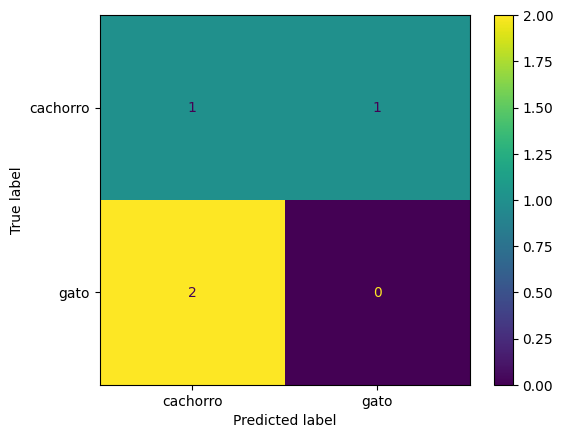

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test_animais, y_pred_animais, labels=['cachorro', 'gato'])
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['cachorro','gato'])
disp.plot()
plt.show()

In [26]:
cm = confusion_matrix(['cachorro', 'gato', 'cachorro','gato'],['gato','cachorro', 'cachorro','cachorro']).ravel()
cm

array([1, 1, 2, 0])

In [27]:
tp, fn, fp, tn = confusion_matrix(['cachorro', 'gato', 'cachorro','gato'],['gato','cachorro', 'cachorro','cachorro']).ravel()
tp, fn, fp, tn

(1, 1, 2, 0)